# Cleaning - missing and duplicate data

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')
import pandas as pd
import numpy as np

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Set max rows and columns displayed in jupyter
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

## Generate some data - specifically a t-shirt order, use the names module to generate random names associated with each order
Order with 300 tshirts, 100 small, 100 medium and 100 large with a bunch missing of missing sizes<br>
have a name, a t-shirt size, and a weight(in pounds)<br>
Use the <a href="https://pypi.org/project/names/https://pypi.org/project/names/">names </a> module to generate random names

In [36]:
#to generate people names
# !pip install names
import names

In [73]:
# average small person weighs 100lbs
# average medium weighs 140 lbs
# average large weighs 180 lbs

#generate a bunch of t-shirts with the following mean,std,numbershirts
x = np.random.normal(100, 15, 100)
x = np.concatenate((x, np.random.normal(140, 20, 100)))
x = np.concatenate((x, np.random.normal(180, 30, 100)))

size=np.empty(300, dtype=object)
size[:99] = 'small'
size[99:199] = 'med'
size[199:300] = 'large'

d = {'weight': x, 't_shirt_size': size}
df = pd.DataFrame(data=d)
df['name'] = "Unknown"

df.name = df.name.map(lambda x: names.get_full_name())
df

,weight,t_shirt_size,name
0,102.823221,small,Katherine Schmitz
1,75.363774,small,Francene Reed
2,76.096931,small,Rubye Simpson
3,105.079842,small,Joseph Pepin
4,132.643400,small,Robert Bonilla
...,...,...,...
295,183.306718,large,Joyce Long
296,211.306957,large,Thresa Sayre
297,199.989582,large,Antonio Peake
298,200.689950,large,Patty Dwyer


In [89]:
# make some duplicates just to show how to handle duplicates (delete them)


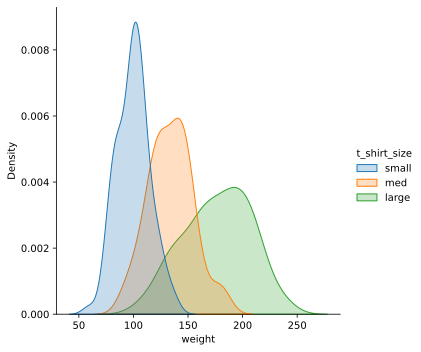

In [74]:
sns.displot(data=df , x="weight",  hue="t_shirt_size" ,kind='kde', fill=True);

## randomly select 10% of rows for ommision

In [75]:
import random
res = random.sample(range(0, 300), 30)
for loc in res:  
    df.loc[loc,'t_shirt_size'] = np.NaN

In [76]:
len(res)

30

In [77]:
#how many are null?
df.t_shirt_size.isna().sum()

30

In [78]:
df.dtypes

weight          float64
t_shirt_size     object
name             object
dtype: object

## How to impute these missing fields
A pretty good way is to find the median weight for each t-shirt size<br>
For each NaN assign t-shirt size to closest median

In [79]:
avgs = df.groupby('t_shirt_size').mean()

In [80]:
avgs.weight

t_shirt_size
large    176.029636
med      133.769807
small     99.703884
Name: weight, dtype: float64

In [81]:
# avgs.index
for val in avgs.weight:
    print(val)
# [abs(0-val) for val in avgs]

176.02963598808853
133.76980660021155
99.7038839658569


In [86]:
df.sort_values(by  = 'weight')

,weight,t_shirt_size,name
43,59.200712,small,Curtis Green
64,71.665775,small,Jennifer Richardson
1,75.363774,small,Francene Reed
60,75.668001,small,Rosa Jackson
95,75.895115,small,Jeffrey Hatcher
...,...,...,...
253,220.498264,large,Nancy Graham
262,229.485125,large,Frances Pickering
235,233.555570,large,Martha Casey
213,235.086162,large,Patricia Mills


In [88]:
df.groupby('t_shirt_size').count()

,weight,name
t_shirt_size,,
large,102,102
med,100,100
small,98,98


In [82]:
#map works on a column apply works on a row, which means we have access tothe entire row

def func(row):
    if row.t_shirt_size is np.NaN:
        lst_vals = [abs(row.weight-val) for val in avgs.weight]
        min_val = min(lst_vals)
        min_index=lst_vals.index(min_val)
        return avgs.index[min_index]
    return row.t_shirt_size

df['t_shirt_size'] = df.apply(func, axis=1)

## Visualization